# **AquaGuard: AI-Powered Underwater Pollution Detection and Classification**

Kağan Canerik 2210765021

Sıla Keskin 2210765032

## **Abstract**

Context: Marine pollution poses a significant threat to aquatic ecosystems, necessitating innovative approaches for monitoring and assessment. Automated systems leveraging machine learning can provide efficient solutions for identifying and classifying underwater debris.

Purpose: This study aims to develop a system that utilizes object detection and classification techniques to assess underwater pollution levels. By detecting various types of debris and calculating a pollution risk score based on predefined coefficients, the system categorizes images into low, medium, or high pollution risk levels.

Method:The research employs a publicly available underwater image dataset, enhanced using the Dark Prior Channel method for better object detection. YOLOv8 is utilized to detect objects, which are then assigned pollution coefficients. The total pollution score is computed for each image, and a risk classification model is applied. The system's performance is evaluated by comparing predicted scores with actual labels using metrics such as accuracy, precision, and recall.

Results:The proposed system achieved high accuracy in both object detection and pollution risk classification. The results demonstrate its potential for real-time marine pollution monitoring and highlight the importance of leveraging machine learning in environmental conservation efforts.


## **Table of Content**

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## **Problem**

Marine pollution is a pressing global issue that threatens the health and stability of aquatic ecosystems. Despite the alarming growth in pollution levels, particularly from land-based sources such as plastic waste and agricultural runoff, existing monitoring methods are inadequate for addressing this challenge. Traditional approaches, such as manual inspections and limited sampling, are not only time-intensive but also fail to capture the vast scale and complexity of underwater environments. Furthermore, the lack of automated systems capable of accurately assessing pollution severity—distinguishing between normal, slightly polluted, and highly polluted conditions—hinders the ability of researchers and policymakers to implement timely and effective mitigation strategies. This gap in efficient, scalable, and real-time tools for evaluating underwater pollution underscores the need for advanced technological solutions to address the growing environmental crisis.

## **Data Understanding**

The dataset used in this project was selected for its relevance to addressing underwater pollution detection and classification tasks. It consists of images depicting underwater scenes contaminated with various types of debris, such as plastics, metals, nets, and other waste materials. The dataset has been preprocessed using the Dark Prior Channel method to enhance image contrast, which significantly improves the visibility and detectability of underwater objects. The dataset is organized into three directories: the train directory contains 3,628 images with corresponding labels, the validation directory includes 1,001 images, and the test directory comprises 501 images, all annotated with bounding box coordinates and class labels. The dataset encompasses 15 object classes, each assigned a pollution coefficient based on its environmental impact. These coefficients are used to calculate a pollution score for each image by summing the weighted contributions of detected objects. This score is then classified into three risk levels: low, medium, and high. The combination of object detection and image classification tasks, coupled with the realistic challenges of underwater scenes, makes this dataset ideal for developing and evaluating models that aim to tackle marine pollution monitoring.

Class Names - ['Mask', 'can', 'cellphone', 'electronics', 'gbottle', 'glove', 'metal', 'misc', 'net', 'pbag', 'pbottle', 'plastic', 'rod', 'sunglasses', 'tire']

| 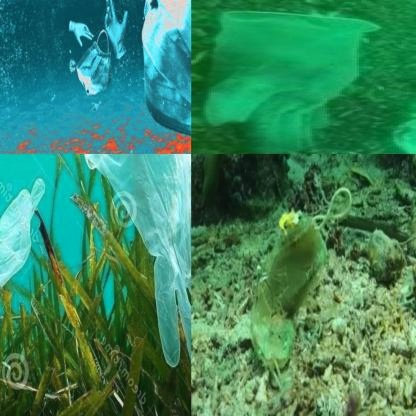 | 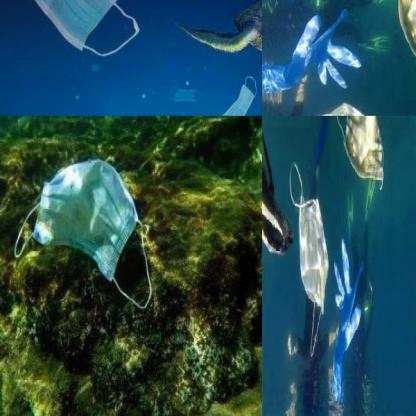 |

## **Data Preparation**

To enhance the robustness and generalizability of our AI model, we performed data preprocessing and augmentation on the original dataset of 3,628 underwater images using Roboflow. During preprocessing, auto-orientation was applied to correct image alignment, and all images were resized to a uniform dimension of 640x640 pixels using the "stretch" resizing method. For data augmentation, we generated three additional variations per training example, resulting in a total of 10,878 images. The augmentations included adjustments to hue (ranging from -20° to +20°), saturation (between -33% and +33%), and brightness (between -23% and +23%), along with the application of blur effects up to 0.9 pixels. These augmentations were designed to simulate diverse environmental conditions and improve the model's ability to recognize pollution under varying circumstances, ensuring a more robust training process.

In [2]:
import os
import glob
import matplotlib.pyplot as plt
from collections import Counter

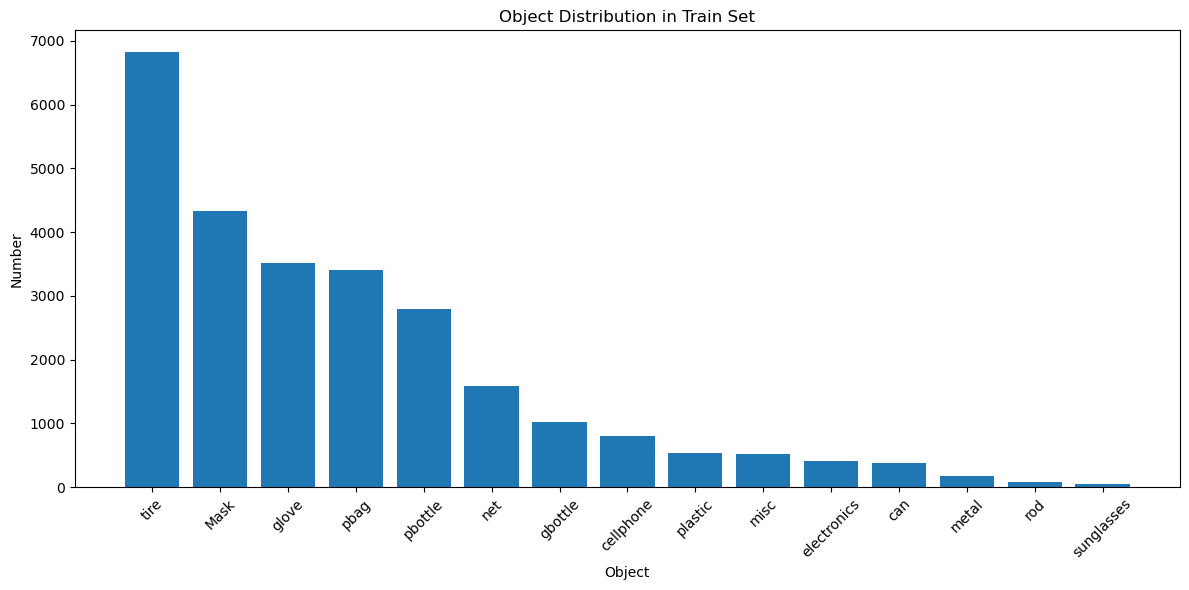

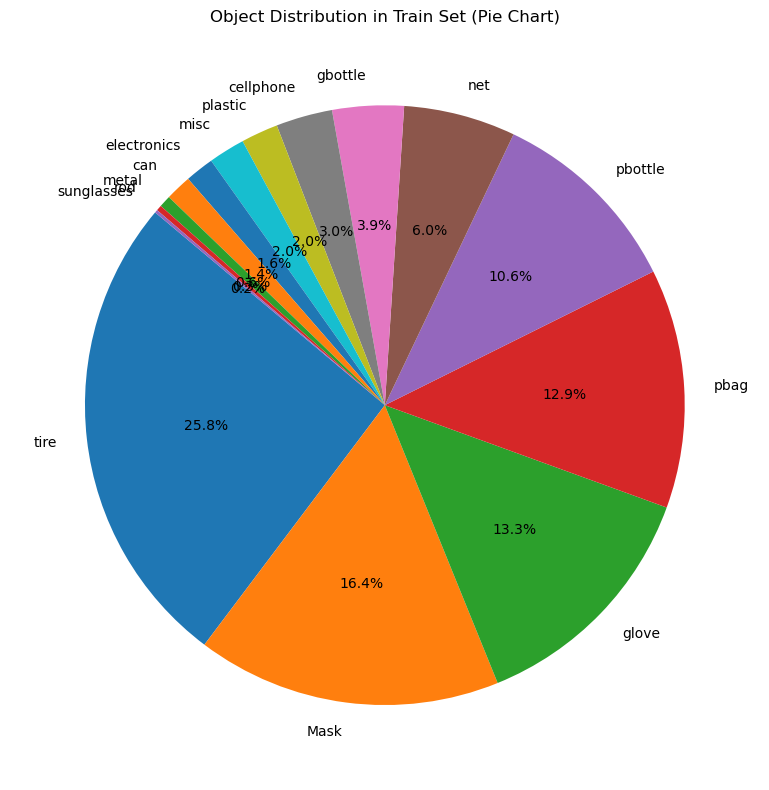

In [3]:
# Path to Train tag files
train_label_folder = "/augmented_data/train/labels"

# Model sınıf isimlerini tanımlayın
class_names = {
    0: 'Mask',
    1: 'can',
    2: 'cellphone',
    3: 'electronics',
    4: 'gbottle',
    5: 'glove',
    6: 'metal',
    7: 'misc',
    8: 'net',
    9: 'pbag',
    10: 'pbottle',
    11: 'plastic',
    12: 'rod',
    13: 'sunglasses',
    14: 'tire'
}

# List all label files
label_files = glob.glob(os.path.join(train_label_folder, "*.txt"))

# We use a Counter to store the total number of each class
class_counts = Counter()

# Process all label files
for label_file in label_files:
    with open(label_file, "r") as f:
        for line in f:
            class_id = int(line.split()[0])  # The first element of each line is the class ID
            class_counts[class_id] += 1

# Match class names
class_counts_named = {class_names[k]: v for k, v in class_counts.items()}

# Sort data (optional)
class_counts_named = dict(sorted(class_counts_named.items(), key=lambda item: item[1], reverse=True))

# Column Chart
plt.figure(figsize=(12, 6))
plt.bar(class_counts_named.keys(), class_counts_named.values())
plt.title("Object Distribution in Train Set")
plt.xlabel("Object")
plt.ylabel("Number")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts_named.values(), labels=class_counts_named.keys(), autopct="%1.1f%%", startangle=140)
plt.title("Object Distribution in Train Set (Pie Chart)")
plt.tight_layout()
plt.show()


The dataset shows a significant class imbalance, with certain objects like tire, mask, and glove dominating the distribution, while others such as sunglasses, metal, and electronics are much less represented. This imbalance could lead to the model being biased towards detecting more frequent classes, potentially lowering its performance on underrepresented categories.

#  **Modeling**

In [9]:
from ultralytics import YOLO
import os
import glob
from sklearn.metrics import classification_report

## **Training YOLOv8 Model with Not Augmented Dataset**

In [9]:

# Loading YOLOv8 Model
model = YOLO("yolov8n.pt")  

model.train(
    
    data="/original_data/data.yaml", 
    epochs=10,           
    imgsz=640,           
    batch=16,            
    device = "cuda"
)


Ultralytics 8.3.49 🚀 Python-3.12.4 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4500, 20170MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/neurolab/Desktop/kagan_canerik/archive/underwater_plastics/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

100%|██████████| 755k/755k [00:00<00:00, 10.3MB/s]

Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

Model summary: 225 layers, 3,013,773 parameters, 3,013,757 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/detect/train4', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 35.5MB/s]


AMP: checks passed ✅


train: Scanning /home/neurolab/Desktop/kagan_canerik/archive/underwater_plastics/train/labels... 3628 images, 2 backgrounds, 0 corrupt: 100%|██████████| 3628/3628 [00:01<00:00, 2208.70it/s]

train: New cache created: /home/neurolab/Desktop/kagan_canerik/archive/underwater_plastics/train/labels.cache



val: Scanning /home/neurolab/Desktop/kagan_canerik/archive/underwater_plastics/valid/labels... 1001 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:00<00:00, 3044.33it/s]

val: New cache created: /home/neurolab/Desktop/kagan_canerik/archive/underwater_plastics/valid/labels.cache


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.28G      1.469      3.553      1.699         28        640: 100%|██████████| 227/227 [00:16<00:00, 13.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 11.37it/s]


                   all       1001       1891      0.665      0.165      0.176      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.21G       1.46      2.718       1.65         16        640: 100%|██████████| 227/227 [00:15<00:00, 14.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.90it/s]

                   all       1001       1891      0.745      0.248      0.251      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.21G      1.452      2.393      1.627         15        640: 100%|██████████| 227/227 [00:15<00:00, 14.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 13.74it/s]

                   all       1001       1891      0.637       0.24      0.241      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.32G      1.415      2.157      1.598         19        640: 100%|██████████| 227/227 [00:15<00:00, 15.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.25it/s]

                   all       1001       1891      0.586      0.299      0.298      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.32G      1.371      1.953      1.551         27        640: 100%|██████████| 227/227 [00:15<00:00, 15.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.61it/s]

                   all       1001       1891      0.616      0.293      0.313      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.23G      1.324      1.769      1.503         21        640: 100%|██████████| 227/227 [00:15<00:00, 14.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.75it/s]

                   all       1001       1891      0.784      0.322      0.355       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.21G      1.288      1.638      1.471         17        640: 100%|██████████| 227/227 [00:15<00:00, 14.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.63it/s]

                   all       1001       1891      0.759       0.36      0.401      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       2.3G      1.249      1.513      1.448         35        640: 100%|██████████| 227/227 [00:15<00:00, 14.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.82it/s]

                   all       1001       1891      0.825      0.362       0.44      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.39G      1.221      1.426      1.422         32        640: 100%|██████████| 227/227 [00:15<00:00, 14.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.58it/s]

                   all       1001       1891      0.664      0.422      0.458      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.28G      1.173      1.321      1.381         24        640: 100%|██████████| 227/227 [00:15<00:00, 14.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.65it/s]

                   all       1001       1891      0.682      0.398      0.473      0.313



10 epochs completed in 0.050 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.12.4 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4500, 20170MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 12.97it/s]


                   all       1001       1891      0.681      0.398      0.473      0.313
                  Mask         77         90      0.898      0.256      0.574      0.373
                   can         18         20       0.67       0.05      0.139     0.0499
             cellphone         61         71      0.972       0.97      0.987      0.847
           electronics         27         40       0.53       0.45      0.437      0.244
               gbottle         36         82      0.439      0.683      0.609       0.37
                 glove         37         55      0.871      0.673      0.785      0.583
                 metal         10         22          1          0     0.0296     0.0132
                  misc         48         51      0.584      0.118      0.228      0.146
                   net        146        148      0.721      0.723      0.754      0.452
                  pbag        290        330      0.793      0.903      0.912      0.757
               pbottl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7faafd9d9b20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

## **Training YOLOv8 Model with Augmented Dataset By Roboflow**

In [1]:
# Loading YOLOv8 model
model = YOLO("yolov8n.pt") 

model.train(
    
    data="/augmented_data/data.yaml", 
    epochs=25,           
    imgsz=640,           
    batch=16,            
    device = "cuda"
)


100%|██████████| 6.25M/6.25M [00:00<00:00, 42.5MB/s]


Ultralytics 8.3.49 🚀 Python-3.12.4 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4500, 20170MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/neurolab/Desktop/kagan_canerik/pollution_detection-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

100%|██████████| 5.35M/5.35M [00:00<00:00, 34.5MB/s]


AMP: checks passed ✅


train: Scanning /home/neurolab/Desktop/kagan_canerik/pollution_detection-1/train/labels... 10878 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10878/10878 [00:05<00:00, 2026.89it/s]


train: New cache created: /home/neurolab/Desktop/kagan_canerik/pollution_detection-1/train/labels.cache


val: Scanning /home/neurolab/Desktop/kagan_canerik/pollution_detection-1/valid/labels... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<00:00, 3088.29it/s]

val: New cache created: /home/neurolab/Desktop/kagan_canerik/pollution_detection-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25       2.5G      1.426      2.925      1.593         75        640: 100%|██████████| 680/680 [00:47<00:00, 14.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 13.92it/s]


                   all       1000       1891      0.475      0.245      0.221      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.56G      1.388      2.093      1.529         62        640: 100%|██████████| 680/680 [00:46<00:00, 14.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.82it/s]

                   all       1000       1891      0.725      0.316      0.327      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.42G      1.382      1.881      1.521        104        640: 100%|██████████| 680/680 [00:45<00:00, 14.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.94it/s]

                   all       1000       1891      0.798      0.306      0.361      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.53G       1.35      1.708      1.493         48        640: 100%|██████████| 680/680 [00:45<00:00, 14.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.68it/s]

                   all       1000       1891      0.655      0.368      0.393      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.39G      1.316      1.566      1.466         51        640: 100%|██████████| 680/680 [00:45<00:00, 14.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.60it/s]

                   all       1000       1891      0.768      0.383      0.447      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.41G      1.278      1.447      1.435         61        640: 100%|██████████| 680/680 [00:46<00:00, 14.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.67it/s]

                   all       1000       1891      0.581       0.41      0.447      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.63G      1.259      1.357      1.421         54        640: 100%|██████████| 680/680 [00:46<00:00, 14.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.59it/s]

                   all       1000       1891      0.687      0.429      0.496      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.38G      1.231      1.292      1.398         55        640: 100%|██████████| 680/680 [00:46<00:00, 14.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.95it/s]

                   all       1000       1891      0.544      0.473      0.514      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.44G      1.213       1.24      1.383         56        640: 100%|██████████| 680/680 [00:46<00:00, 14.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.08it/s]

                   all       1000       1891       0.66      0.523      0.595      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       2.5G      1.192      1.189       1.37         51        640: 100%|██████████| 680/680 [00:46<00:00, 14.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.84it/s]

                   all       1000       1891      0.672      0.505      0.569      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.62G      1.169      1.126       1.35         67        640: 100%|██████████| 680/680 [00:46<00:00, 14.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.81it/s]

                   all       1000       1891       0.72      0.471      0.577      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.41G       1.17      1.125      1.352         46        640: 100%|██████████| 680/680 [00:46<00:00, 14.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 15.00it/s]

                   all       1000       1891      0.596      0.627      0.648      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.39G       1.14      1.069      1.334         44        640: 100%|██████████| 680/680 [00:46<00:00, 14.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.85it/s]

                   all       1000       1891      0.622      0.592      0.626      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       2.5G      1.125      1.033      1.322         47        640: 100%|██████████| 680/680 [00:46<00:00, 14.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.87it/s]

                   all       1000       1891      0.655      0.626      0.644      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.62G      1.114      1.002      1.313         73        640: 100%|██████████| 680/680 [00:46<00:00, 14.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.82it/s]

                   all       1000       1891       0.62      0.691      0.698      0.418


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.39G      1.051      0.809      1.299         16        640: 100%|██████████| 680/680 [00:46<00:00, 14.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.29it/s]

                   all       1000       1891      0.731      0.596      0.685      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.41G      1.021     0.7574      1.282         50        640: 100%|██████████| 680/680 [00:46<00:00, 14.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.82it/s]

                   all       1000       1891      0.723      0.678      0.737      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.39G      1.001      0.721      1.264         21        640: 100%|██████████| 680/680 [00:46<00:00, 14.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 15.21it/s]

                   all       1000       1891      0.715      0.678      0.737      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.41G     0.9795     0.6909      1.253         21        640: 100%|██████████| 680/680 [00:45<00:00, 14.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 15.08it/s]

                   all       1000       1891      0.778      0.687      0.762      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.48G     0.9554     0.6585      1.235         26        640: 100%|██████████| 680/680 [00:46<00:00, 14.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 15.28it/s]

                   all       1000       1891        0.8      0.677      0.765      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.37G     0.9423     0.6413      1.221         35        640: 100%|██████████| 680/680 [00:46<00:00, 14.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.25it/s]

                   all       1000       1891      0.761        0.7      0.766      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25       2.3G     0.9263     0.6189       1.21         44        640: 100%|██████████| 680/680 [00:46<00:00, 14.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.93it/s]

                   all       1000       1891      0.786      0.688      0.763      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.41G     0.9105     0.6002      1.202         16        640: 100%|██████████| 680/680 [00:46<00:00, 14.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 15.28it/s]

                   all       1000       1891      0.788      0.735      0.792      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.39G     0.8915     0.5784      1.186         36        640: 100%|██████████| 680/680 [00:45<00:00, 14.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 15.29it/s]

                   all       1000       1891      0.802      0.748      0.805      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.29G     0.8777     0.5673      1.179         42        640: 100%|██████████| 680/680 [00:46<00:00, 14.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 14.51it/s]

                   all       1000       1891      0.793      0.744      0.804      0.502



25 epochs completed in 0.339 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.12.4 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4500, 20170MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:02<00:00, 13.17it/s]


                   all       1000       1891      0.791      0.744      0.803      0.502
                  Mask         77         90      0.949      0.619      0.829      0.593
                   can         18         20      0.824      0.702      0.831      0.298
             cellphone         61         71      0.934      0.972       0.99       0.86
           electronics         27         40      0.758      0.725      0.814      0.498
               gbottle         36         82      0.675      0.805      0.797      0.563
                 glove         37         55      0.891      0.818      0.853      0.667
                 metal         10         22      0.444      0.364      0.374      0.215
                  misc         48         51      0.638      0.706      0.736      0.417
                   net        146        148      0.886      0.889      0.931      0.659
                  pbag        290        330      0.857       0.97      0.969      0.825
               pbottl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fe131093500>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

# **Test**

## **Evaulation**

In [14]:
def evaluate(model_path):


    model= YOLO(model_path)
    # The paths of test folder
    test_image_folder = "/original_data/test/images"
    test_label_folder = "/original_data/test/labels"
    
    # Pollution coefficients
    coefficients = {
        'Mask': 3,
        'can': 2,
        'cellphone': 4,
        'electronics': 4,
        'gbottle': 1,
        'glove': 3,
        'metal': 2,
        'misc': 2,
        'net': 5,
        'pbag': 3,
        'pbottle': 3,
        'plastic': 3,
        'rod': 1,
        'sunglasses': 2,
        'tire': 4
    }
    
    # Function that determines risk levels
    def determine_risk(score):
        if score <= 3:
            return "Low Risk"
        elif 4 <= score <= 7:
            return "Medium Risk"
        else:
            return "High Risk"
    
   # Lists for actual and estimated risk levels and classes
    y_true_risk = []  # Actual risk levels
    y_pred_risk = []  # Estimated risk levels
    y_true = []       # Real labels
    y_pred = []       # Predicted labels
    
    # Unknown class value. To avoid size discrepancy of predicted and actual lists
    UNKNOWN_CLASS = -1
    
    # List all image files
    image_files = glob.glob(os.path.join(test_image_folder, "*.jpg")) + glob.glob(os.path.join(test_image_folder, "*.png"))
    
    # Starting processing images
    for image_file in image_files:
        # estimation of model
        results = model(image_file, verbose=False)
    
        # Estimated classes and their numbers
        predicted_classes = [int(box.cls[0]) for box in results[0].boxes]
        predicted_class_names = [model.names[cls] for cls in predicted_classes]
    
        # Calculate pollution score
        predicted_score = sum(coefficients.get(class_name, 0) for class_name in predicted_class_names)
        predicted_risk = determine_risk(predicted_score)
        y_pred_risk.append(predicted_risk)
    
        # Add predicted classes to the global list
        y_pred.extend(predicted_classes)
    
        # Reading the actual tag file
        label_file = os.path.join(
            test_label_folder,
            os.path.basename(image_file).replace(".jpg", ".txt").replace(".png", ".txt")
        )
        if os.path.exists(label_file):
            with open(label_file, "r") as f:
                true_classes = [int(line.split()[0]) for line in f.readlines()]
                true_class_names = [model.names[cls] for cls in true_classes]
    
            # Calculate the actual pollution score
            true_score = sum(coefficients.get(class_name, 0) for class_name in true_class_names)
            true_risk = determine_risk(true_score)
            y_true_risk.append(true_risk)
    
            # Matching real tags for all detected classes
            for pred_class in predicted_classes:
                if pred_class in true_classes:
                    y_true.append(pred_class)
                else:
                    y_true.append(UNKNOWN_CLASS)
        else:
            # If there is no tag file, mark as unknown
            y_true_risk.append("Unknown")
            y_true.extend([UNKNOWN_CLASS] * len(predicted_classes))
    
    # Calculate performance metrics
    if len(y_true_risk) > 0 and len(y_pred_risk) > 0:
        print("Risk Level Classification Report:")
        print(classification_report(
            y_true_risk,
            y_pred_risk,
            labels=["Low Risk", "Medium Risk", "High Risk"],
            zero_division=0
        ))
    
    if len(y_true) > 0 and len(y_pred) > 0:
        print("Object Classification Report:")
        print(classification_report(
            y_true,
            y_pred,
            labels=list(model.names.keys()) + [UNKNOWN_CLASS],
            target_names=list(model.names.values()) + ["Unknown"],
            zero_division=0
        ))
    else:
        print("Not enough data found!")


In [15]:
model_not_augmented = "/runs_original/detect/train4/weights/best.pt"
model_augmented = "/runs_augmented/detect/train/weights/best.pt"

In [17]:
print("Results without data augmentation")
evaluate(model_not_augmented)

Results without data augmentation
Risk Level Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.87      0.84      0.85       233
 Medium Risk       0.75      0.72      0.74       183
   High Risk       0.69      0.81      0.75        85

    accuracy                           0.79       501
   macro avg       0.77      0.79      0.78       501
weighted avg       0.79      0.79      0.79       501

Object Classification Report:
              precision    recall  f1-score   support

        Mask       0.92      1.00      0.96        23
         can       1.00      1.00      1.00         4
   cellphone       0.96      1.00      0.98        45
 electronics       0.79      1.00      0.88        15
     gbottle       0.73      1.00      0.84        65
       glove       0.92      1.00      0.96        22
       metal       0.00      0.00      0.00         0
        misc       0.69      1.00      0.82         9
         net       0.70      1.00 

In [18]:
print("Results with data augmentation")
evaluate(model_augmented)

Results with data augmentation
Risk Level Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.94      0.85      0.89       233
 Medium Risk       0.84      0.83      0.83       183
   High Risk       0.68      0.89      0.78        85

    accuracy                           0.85       501
   macro avg       0.82      0.85      0.83       501
weighted avg       0.86      0.85      0.85       501

Object Classification Report:
              precision    recall  f1-score   support

        Mask       0.97      1.00      0.99        34
         can       0.74      1.00      0.85        14
   cellphone       0.98      1.00      0.99        47
 electronics       0.85      1.00      0.92        17
     gbottle       0.94      1.00      0.97        48
       glove       1.00      1.00      1.00        28
       metal       0.67      1.00      0.80         8
        misc       0.76      1.00      0.87        26
         net       0.89      1.00    